KNN Model Accuracy: 1.0


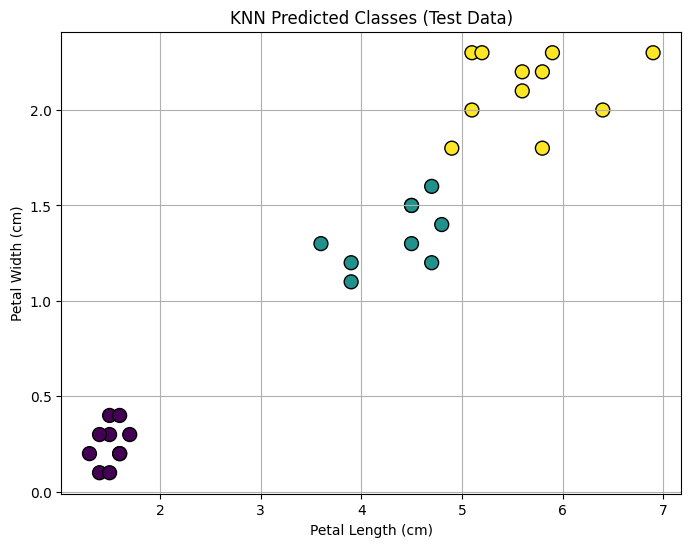

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset from URL
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url)

# Encode the target column 'species' into numerical labels
label_encoder = LabelEncoder()
df['Species_Label'] = label_encoder.fit_transform(df['species'])

X = df.drop(columns=['species', 'Species_Label'])  # Features
y = df['Species_Label']                            # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)

# Optional: Visualize predictions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_test['petal_length'], X_test['petal_width'],
    c=y_pred, cmap='viridis', edgecolor='k', s=100
)
plt.title("KNN Predicted Classes (Test Data)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()
